In [ ]:
#import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import statistics as st
import keras
from imblearn.under_sampling import RandomUnderSampler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout
from tensorflow.python.keras import regularizers
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import confusion_matrix
#!{sys.executable} -m pip install keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""

"""
def create_dataframe_X(x_file, x_time_file):
    df1 = pd.read_csv(x_file, sep = ',', names = ['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr'])
    df2 = pd.read_csv(x_time_file, names = ['Time stamp'])
    frames = [df1, df2]
    result = pd.concat(frames, axis = 1)
    return result
    
"""

""" 
def create_dataframe_Y(y_file, y_time_file):
    df1 = pd.read_csv(y_file, names = ['Label'])
    df2 = pd.read_csv(y_time_file, names = ['Time stamp'])
    frames = [df1, df2]
    result = pd.concat(frames, axis = 1)
    return result
    
"""
    We take the outputs of create_dataframe_X and create_dataframe_Y. In order to combine both of these
    dataframes, we need look at the time intervals present for when the labels were assigned. The goal is
    to return a dataframe that now has an eighth column in addition to the seven columns from the dataframe
    from create_dataframe_X. Additionally, we know that x_frame contains more values than y_frame. We want to
    map these labels accordingly. In the end, we drop data points that have missing values.
    
    @param x_frame: dataframe from create_dataframe_X
    @param y_frame: dataframe from create_dataframe_Y
    @return dataframe with 8 columns (7 attributes and label)
"""
def combine_frames(x_frame, y_frame):
    # Change each dataframe column to a list for iterations
    labels = y_frame['Label'].tolist()
    time_stamp_y = y_frame['Time stamp'].tolist()
    time_stamp_x = x_frame['Time stamp'].tolist()
    
    labels_for_x = [] # Create empty list to gather corresponding labels for x_frame
    count = 0
    for i in range(0, len(time_stamp_y)):
        while (time_stamp_x[count] <= time_stamp_y[i]) and (count <= len(time_stamp_x)):
            labels_for_x.append(labels[i])
            count += 1
        continue
    
    # Concatenate the dataframes
    label_df = pd.DataFrame(labels_for_x, columns = ['Label']) # Convert list back to data frame
    combined_frame = pd.concat([x_frame, label_df], axis = 1)
    
    # Drop missing values at the end
    combined_frame = combined_frame.dropna()
    
    # Drop 'Time stamp' column
    combined_frame = combined_frame.drop(columns = ['Time stamp'])
    return combined_frame

In [ ]:

# Subject_001_01

df_x_1_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__x_time.csv')
df_y_1_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_01__y_time.csv')
frame_1_1 = combine_frames(df_x_1_1, df_y_1_1)

# Subject_001_02
df_x_1_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02__x_time.csv')
df_y_1_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_02__y_time.csv')
frame_1_2 = combine_frames(df_x_1_2, df_y_1_2)

# Subject_001_03
df_x_1_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03__x_time.csv')
df_y_1_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_03__y_time.csv')
frame_1_3 = combine_frames(df_x_1_3, df_y_1_3)

# Subject_001_04
df_x_1_4 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04__x_time.csv')
df_y_1_4 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_04__y_time.csv')
frame_1_4 = combine_frames(df_x_1_4, df_y_1_4)

# Subject_001_05
df_x_1_5 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05__x_time.csv')
df_y_1_5 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_05__y_time.csv')
frame_1_5 = combine_frames(df_x_1_5, df_y_1_5)

# Subject_001_06
df_x_1_6 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06__x_time.csv')
df_y_1_6 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_06__y_time.csv')
frame_1_6 = combine_frames(df_x_1_6, df_y_1_6)

# Subject_001_07
df_x_1_7 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07__x_time.csv')
df_y_1_7 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_07__y_time.csv')
frame_1_7 = combine_frames(df_x_1_7, df_y_1_7)

# Subject_001_08
df_x_1_8 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08__x_time.csv')
df_y_1_8 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_001_08__y_time.csv')
frame_1_8 = combine_frames(df_x_1_8, df_y_1_8)

# Subject_002_01
df_x_2_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_01__x_time.csv')
df_y_2_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_01__y_time.csv')
frame_2_1 = combine_frames(df_x_2_1, df_y_2_1)

# Subject_002_02
df_x_2_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_02__x_time.csv')
df_y_2_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_02__y_time.csv')
frame_2_2 = combine_frames(df_x_2_2, df_y_2_2)

# Subject_002_03
df_x_2_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_03__x_time.csv')
df_y_2_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_03__y_time.csv')
frame_2_3 = combine_frames(df_x_2_3, df_y_2_3)

# Subject_002_04
df_x_2_4 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_04__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_04__x_time.csv')
df_y_2_4 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_04__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_04__y_time.csv')
frame_2_4 = combine_frames(df_x_2_4, df_y_2_4)

# Subject_002_05
df_x_2_5 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_05__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_05__x_time.csv')
df_y_2_5 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_05__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_002_05__y_time.csv')
frame_2_5 = combine_frames(df_x_2_5, df_y_2_5)

# Subject_003_01
df_x_3_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_01__x_time.csv')
df_y_3_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_01__y_time.csv')
frame_3_1 = combine_frames(df_x_3_1, df_y_3_1)

# Subject_003_02
df_x_3_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_02__x_time.csv')
df_y_3_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_02__y_time.csv')
frame_3_2 = combine_frames(df_x_3_2, df_y_3_2)

# Subject_003_03
df_x_3_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_03__x_time.csv')
df_y_3_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_003_03__y_time.csv')
frame_3_3 = combine_frames(df_x_3_3, df_y_3_3)

# Subject_004_01
df_x_4_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_01__x_time.csv')
df_y_4_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_01__y_time.csv')
frame_4_1 = combine_frames(df_x_4_1, df_y_4_1)

# Subject_004_02
df_x_4_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_02__x_time.csv')
df_y_4_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_004_02__y_time.csv')
frame_4_2 = combine_frames(df_x_4_2, df_y_4_2)

# Subject_005_01
df_x_5_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_01__x_time.csv')
df_y_5_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_01__y_time.csv')
frame_5_1 = combine_frames(df_x_5_1, df_y_5_1)

# Subject_005_02
df_x_5_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_02__x_time.csv')
df_y_5_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_02__y_time.csv')
frame_5_2 = combine_frames(df_x_5_2, df_y_5_2)

# Subject_005_03
df_x_5_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_03__x_time.csv')
df_y_5_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_005_03__y_time.csv')
frame_5_3 = combine_frames(df_x_5_3, df_y_5_3)

# Subject_006_01
df_x_6_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_01__x_time.csv')
df_y_6_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_01__y_time.csv')
frame_6_1 = combine_frames(df_x_6_1, df_y_6_1)

# Subject_006_02
df_x_6_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_02__x_time.csv')
df_y_6_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_02__y_time.csv')
frame_6_2 = combine_frames(df_x_6_2, df_y_6_2)

# Subject_006_03
df_x_6_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_03__x_time.csv')
df_y_6_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_006_03__y_time.csv')
frame_6_3 = combine_frames(df_x_6_3, df_y_6_3)

# Subject_007_01
df_x_7_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_01__x_time.csv')
df_y_7_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_01__y_time.csv')
frame_7_1 = combine_frames(df_x_7_1, df_y_7_1)

# Subject_007_02
df_x_7_2 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_02__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_02__x_time.csv')
df_y_7_2 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_02__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_02__y_time.csv')
frame_7_2 = combine_frames(df_x_7_2, df_y_7_2)

# Subject_007_03
df_x_7_3 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_03__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_03__x_time.csv')
df_y_7_3 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_03__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_03__y_time.csv')
frame_7_3 = combine_frames(df_x_7_3, df_y_7_3)

# Subject_007_04
df_x_7_4 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_04__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_04__x_time.csv')
df_y_7_4 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_04__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_007_04__y_time.csv')
frame_7_4 = combine_frames(df_x_7_4, df_y_7_4)

# Subject_008_01
df_x_8_1 = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_008_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_008_01__x_time.csv')
df_y_8_1 = create_dataframe_Y('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_008_01__y.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TrainingData/subject_008_01__y_time.csv')
frame_8_1 = combine_frames(df_x_8_1, df_y_8_1)

In [ ]:
"""
    Combining all data frames.
"""
frame_list = [frame_1_1, frame_1_2, frame_1_3, frame_1_4, frame_1_5, frame_1_6, frame_1_7, frame_1_8,
             frame_2_1, frame_2_2, frame_2_3, frame_2_4, frame_2_5,
             frame_3_1, frame_3_2, frame_3_3,
             frame_4_1, frame_4_2,
             frame_5_1, frame_5_2, frame_5_3,
             frame_6_1, frame_6_2, frame_6_3,
             frame_7_1, frame_7_2, frame_7_3, frame_7_4,
             frame_8_1]
data = pd.concat(frame_list)

0.0    1006845
3.0     206436
2.0      73068
1.0      55216
Name: Label, dtype: int64


<Axes: >

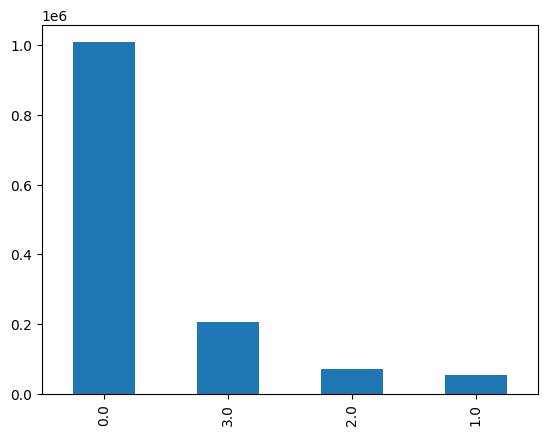

In [ ]:
gy=data['Label'].value_counts()
print(gy)
data['Label'].value_counts().plot(kind='bar')

In [ ]:
# Create X and y
X = data[['X_acc', 'Y_acc', 'Z_acc', 'X_gyr', 'Y_gyr', 'Z_gyr']]
y = data['Label']
#X.summary()

In [ ]:
item0 = X.iloc[0::4,].reset_index()
item1 = X.iloc[1::4,].reset_index()
item2 = X.iloc[2::4,].reset_index()
item3 = X.iloc[3::4,].reset_index()
new_X = pd.concat([item0, item1, item2, item3], axis = 1, ignore_index = True)
new_y = y.iloc[::4].reset_index()
new_X = new_X.dropna()
new_X = new_X.drop(columns = [0, 7, 14, 21])
new_y = new_y.iloc[0:335391]
new_y = new_y.drop(columns = ["index"])
rows = len(new_X.index)  
cols = len(new_X.columns)  

# Printing the number of Dataframe's rows and columns  
print("Rows: ", rows)  
print("Columns: ", cols)  

Rows:  335391
Columns:  24


In [ ]:
# Performing random undersampling on the data
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(new_X, new_y)
data_resampled = pd.concat([X_resampled, y_resampled], axis = 1)

In [ ]:
"""
    Creating training, validation, and test sets from a data frame.
    
    @param frame: dataframe passed in
    @return training, validation, and test sets created from frame passed in
"""
def training_validation_test_split(frame):
    frame_copy = frame.copy()
    training_set = frame_copy.sample(frac = 0.75, random_state = 0)
    val_temp = frame_copy.drop(training_set.index)
    validation_set = val_temp.sample(frac = 0.4, random_state = 0)
    test_set = val_temp.drop(validation_set.index)
    return training_set, validation_set, test_set

training, val, test = training_validation_test_split(data_resampled)

In [ ]:
#Modeling
# Defining a function for plotting training and validation learning curves
def plot_history(history):
	# plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

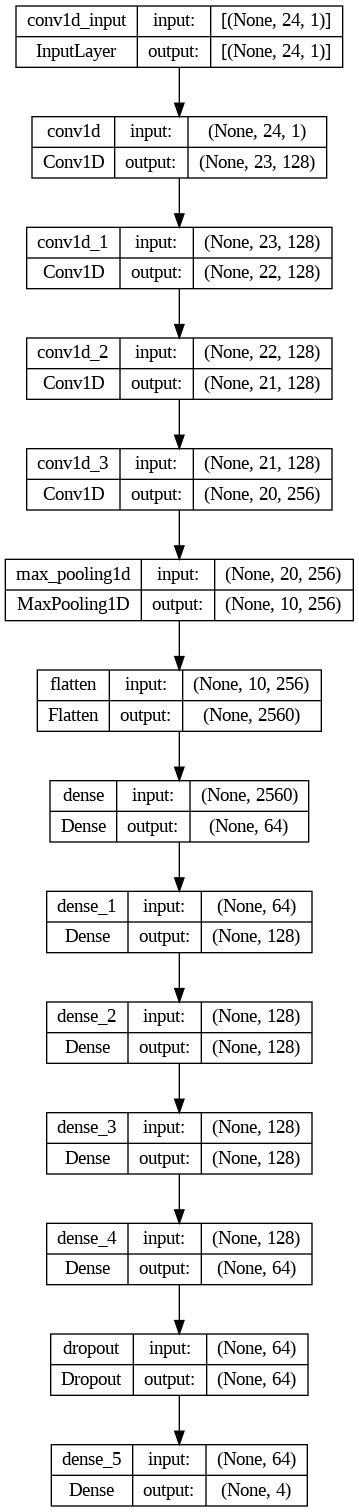

In [ ]:
# Define a CNN model
# from https://www.datatechnotes.com/2020/02/classification-example-with-keras-cnn.html
def define_CNN_model(drop_rate, l1_value, l2_value):
    model = Sequential()
    
    model.add(Conv1D(128, 2, activation="relu", 
                     kernel_regularizer=regularizers.l1_l2(l1=l1_value, l2=l2_value), 
                     input_shape=(24,1)))
    model.add(Conv1D(128, 2, activation="relu"))
    model.add(Conv1D(128, 2, activation="relu"))
    model.add(Conv1D(256, 2, activation="relu"))
    model.add(MaxPooling1D())
    model.add(Flatten())   
    model.add(Dense(64, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(rate = drop_rate))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])    
    
    return model

# Creating an instance
model_d3 = define_CNN_model(0.1, 0.01, 0.01)
plot_model(model_d3, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')


In [ ]:
model_d3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           384       
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 128)           32896     
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           32896     
                                                                 
 conv1d_3 (Conv1D)           (None, 20, 256)           65792     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 256)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                        

In [ ]:
# Create X and y for training data
training_X = training[[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27]]
training_X = np.expand_dims(training_X, axis = 2) # Reshape 
training_y = training['Label']
training_y_encoded = to_categorical(training_y) # One-hot encoding

# Create X and y for validation data
val_X = val[[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27]]
val_X = np.expand_dims(val_X, axis = 2) # Reshape
val_y = val['Label']
val_y_encoded = to_categorical(val_y) # One-hot encoding
#tf.config.run_functions_eagerly(True)

In [ ]:
# Define the drop out grid
#dropout_grid = [0.1, 0.5, 0.9]
dropout_grid = [0.1]

# l1_grid = [2**-5, 2**-6, 2**-7, 2**-8]
# l2_grid = [2**-5, 2**-6, 2**-7, 2**-8]
l1_grid = [2**-5, 2**-6]
l2_grid = [2**-5, 2**-6]

tot = len(dropout_grid) * len(l1_grid) * len(l2_grid)

# Variables for the best result
scores = []
best_history = [] # place holder
best_ind = 0
best_acc = 0

# Loop through each combination
pos = 0
for ii in dropout_grid:
    for jj in l1_grid:
        for kk in l2_grid:
            pos = pos + 1
            print("Fitting the ", pos, "/", tot , " model")
            # define the model
            curr_model = define_CNN_model(ii, jj, kk)
            #curr_model.summary()
            
            # train the model
            curr_history = curr_model.fit(training_X, training_y_encoded, epochs = 10, 
                                          validation_data = (val_X, val_y_encoded), verbose = 0)
            curr_acc = st.mean(curr_history.history['val_accuracy'][5:10])
                        
            # get prediction report
            y_pred = curr_model.predict(val_X, batch_size=64, verbose=0)
            y_pred_bool = np.argmax(y_pred, axis=1)
            scores.append(classification_report(val_y, y_pred_bool))
            
            # save the best result
            if best_acc < curr_acc:
                best_acc = curr_acc
                best_ind = pos - 1
                best_history = curr_history


Fitting the  1 / 4  model
Fitting the  2 / 4  model
Fitting the  3 / 4  model
Fitting the  4 / 4  model


In [ ]:
# Training a model with ideal hyper-parameters (best_ind = 14)
best_model = define_CNN_model(0.1, .000976, 0.0078)
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 23, 128)           384       
                                                                 
 conv1d_25 (Conv1D)          (None, 22, 128)           32896     
                                                                 
 conv1d_26 (Conv1D)          (None, 21, 128)           32896     
                                                                 
 conv1d_27 (Conv1D)          (None, 20, 256)           65792     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2560)              0         
                                                      

In [ ]:
# Fit the model
best_history = best_model.fit(training_X, training_y_encoded, epochs = 30, validation_data = (val_X, val_y_encoded), verbose = 1) 

Epoch 1/30
1295/1295 [==============================] - 41s 30ms/step - loss: 0.9567 - accuracy: 0.5517 - val_loss: 0.7412 - val_accuracy: 0.6653
Epoch 2/30
1295/1295 [==============================] - 38s 29ms/step - loss: 0.7142 - accuracy: 0.6685 - val_loss: 0.6925 - val_accuracy: 0.6749
Epoch 3/30
1295/1295 [==============================] - 41s 31ms/step - loss: 0.6597 - accuracy: 0.6921 - val_loss: 0.6364 - val_accuracy: 0.7081
Epoch 4/30
1295/1295 [==============================] - 39s 30ms/step - loss: 0.6261 - accuracy: 0.7133 - val_loss: 0.6301 - val_accuracy: 0.7164
Epoch 5/30
1295/1295 [==============================] - 40s 31ms/step - loss: 0.5931 - accuracy: 0.7351 - val_loss: 0.6164 - val_accuracy: 0.7262
Epoch 6/30
1295/1295 [==============================] - 38s 29ms/step - loss: 0.5703 - accuracy: 0.7500 - val_loss: 0.6109 - val_accuracy: 0.7345
Epoch 7/30
1295/1295 [==============================] - 43s 33ms/step - loss: 0.5469 - accuracy: 0.7638 - val_loss: 0.5851 -

0.7787033677101135


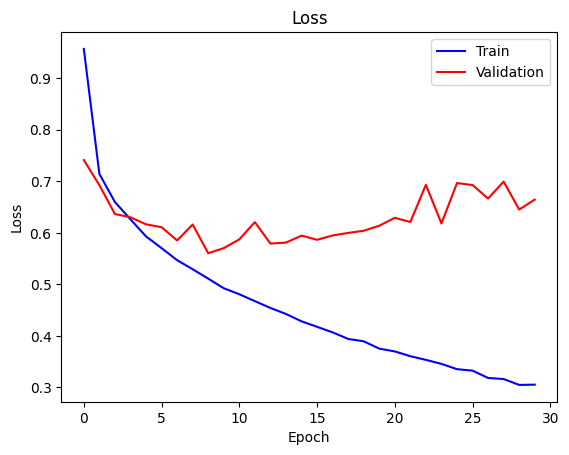

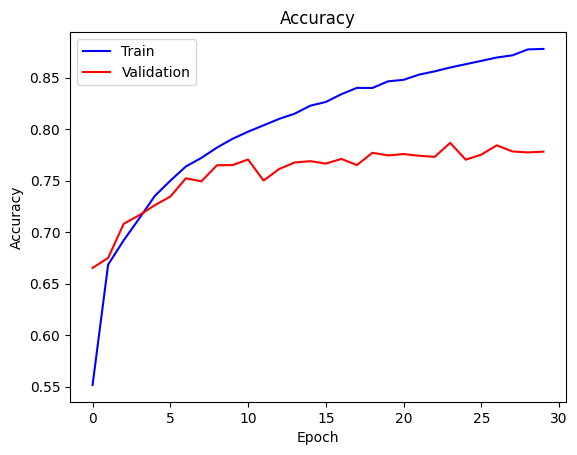

In [ ]:
# Calculate the stat
curr_acc = st.mean(best_history.history['val_accuracy'][25:30]) 
print(curr_acc)

# Plot the fit history
plot_history(best_history)

In [ ]:
# Get prediction report
y_pred = best_model.predict(val_X, batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(val_y, y_pred_bool))

              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      1333
         1.0       0.90      0.87      0.88      1387
         2.0       0.92      0.93      0.93      1367
         3.0       0.68      0.63      0.66      1435

    accuracy                           0.78      5522
   macro avg       0.78      0.78      0.78      5522
weighted avg       0.78      0.78      0.78      5522



In [ ]:
# Get the predictions of the test set given in /TestData
subject9_X = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_009_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_009_01__x_time.csv')
subject10_X = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_010_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_010_01__x_time.csv')
subject11_X = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_011_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_011_01__x_time.csv')
subject12_X = create_dataframe_X('/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_012_01__x.csv', '/content/drive/MyDrive/ECE542_sp2022_Project_TerrainRecognition/TestData/subject_012_01__x_time.csv')

subject9_X = subject9_X.drop(columns = ['Time stamp'])
subject10_X = subject10_X.drop(columns = ['Time stamp'])
subject11_X = subject11_X.drop(columns = ['Time stamp'])
subject12_X = subject12_X.drop(columns = ['Time stamp'])

item_9_0 = subject9_X.iloc[0::4,].reset_index()
item_9_1 = subject9_X.iloc[1::4,].reset_index()
item_9_2 = subject9_X.iloc[2::4,].reset_index()
item_9_3 = subject9_X.iloc[3::4,].reset_index()
new_9_X = pd.concat([item_9_0, item_9_1, item_9_2, item_9_3], axis = 1, ignore_index = True)
new_9_X = new_9_X.dropna()
new_9_X = new_9_X.drop(columns = [0, 7, 14, 21])

item_10_0 = subject10_X.iloc[0::4,].reset_index()
item_10_1 = subject10_X.iloc[1::4,].reset_index()
item_10_2 = subject10_X.iloc[2::4,].reset_index()
item_10_3 = subject10_X.iloc[3::4,].reset_index()
new_10_X = pd.concat([item_10_0, item_10_1, item_10_2, item_10_3], axis = 1, ignore_index = True)
new_10_X = new_10_X.dropna()
new_10_X = new_10_X.drop(columns = [0, 7, 14, 21])

item_11_0 = subject11_X.iloc[0::4,].reset_index()
item_11_1 = subject11_X.iloc[1::4,].reset_index()
item_11_2 = subject11_X.iloc[2::4,].reset_index()
item_11_3 = subject11_X.iloc[3::4,].reset_index()
new_11_X = pd.concat([item_11_0, item_11_1, item_11_2, item_11_3], axis = 1, ignore_index = True)
new_11_X = new_11_X.dropna()
new_11_X = new_11_X.drop(columns = [0, 7, 14, 21])

item_12_0 = subject12_X.iloc[0::4,].reset_index()
item_12_1 = subject12_X.iloc[1::4,].reset_index()
item_12_2 = subject12_X.iloc[2::4,].reset_index()
item_12_3 = subject12_X.iloc[3::4,].reset_index()
new_12_X = pd.concat([item_12_0, item_12_1, item_12_2, item_12_3], axis = 1, ignore_index = True)
new_12_X = new_12_X.dropna()
new_12_X = new_12_X.drop(columns = [0, 7, 14, 21])

# Reshaping input for CNN
new_9_X = np.expand_dims(new_9_X, axis = 2)
new_10_X = np.expand_dims(new_10_X, axis = 2)
new_11_X = np.expand_dims(new_11_X, axis = 2)
new_12_X = np.expand_dims(new_12_X, axis = 2)

In [ ]:
# Subject 9 Predictions
subject9_predictions = best_model.predict(new_9_X, batch_size=64, verbose=0)
subject9_pred_bool = np.argmax(subject9_predictions, axis=1)

# Subject 10 Predictions
subject10_predictions = best_model.predict(new_10_X, batch_size=64, verbose=0)
subject10_pred_bool = np.argmax(subject10_predictions, axis=1)

# Subject 11 Predictions
subject11_predictions = best_model.predict(new_11_X, batch_size=64, verbose=0)
subject11_pred_bool = np.argmax(subject11_predictions, axis=1)

# Subject 12 Predictions
subject12_predictions = best_model.predict(new_12_X, batch_size=64, verbose=0)
subject12_pred_bool = np.argmax(subject12_predictions, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix()
# plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues)
# plt.show()
# print(classification_report(y_test, y_pred))

In [ ]:
# Saving results to CSV
subject9 = pd.DataFrame(subject9_pred_bool)
subject9.to_csv('subject_009_01__y_prediction.csv',index=False)
subject10 = pd.DataFrame(subject10_pred_bool)
subject10.to_csv('subject_010_01__y_prediction.csv',index=False,header=False)
subject11 = pd.DataFrame(subject11_pred_bool)
subject11.to_csv('subject_011_01__y_prediction.csv',index=False,header=False)
subject12 = pd.DataFrame(subject12_pred_bool)
subject12.to_csv('subject_012_01__y_prediction.csv',index=False)